# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

(Please insert the background here )

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests
import warnings
warnings.filterwarnings('ignore')

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data?start_date=2022-06-01&end_date=2022-06-30#panel')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js"></script><script async defer src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" '

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [4]:
table = soup.find('div', attrs={'class':'card-block'})
print(table.prettify()[1:500])

div class="card-block">
 <div class="coingecko-table table-responsive" data-controller="historical">
  <div class="tw-flex tw-justify-end tw-items-center">
  </div>
  <div class="tw-flex flex-column flex-md-row tw-justify-end tw-items-end align-items-md-center py-2">
   <div class="py-1 pr-md-2 range-links">
    <a class="mx-1" href="/en/coins/ethereum/historical_data?end_date=2022-07-07&amp;start_date=2022-06-30#panel">
     7d
    </a>
    <a class="mx-1" href="/en/coins/ethereum/historical_d


Finding row length.

In [5]:
row = table.find_all('th', attrs={'class':'font-semibold text-center'})
row_length = len(row)

In [6]:
row_length

30

Since all the column's values have the same class (text-center), we will create its own length for later looping

In [7]:
val = table.find_all('td', attrs={'class':'text-center'})
val_length = len(val)

In [8]:
val_length

120

Do the scrapping process here (please change this markdown with your explanation)

In [9]:
temp_p = []#initiating a list for period
temp_v = []#initiating a list for volume
temp_o = []#initiating a list for open

for i in range(0, row_length):

    #get period
    period = table.find_all('th', attrs={'class':'font-semibold text-center'})[i].text
        
    temp_p.append(period)
    
for v in range(1, val_length, 4):
    
    #get volume
    volume = table.find_all('td', attrs={'class':'text-center'})[v].text
    volume = volume.strip()
    
    temp_v.append(volume)
    
for o in range(2, val_length, 4):
    
    #get open
    op = table.find_all('td', attrs={'class':'text-center'})[o].text
    op = op.strip()
    
    temp_o.append(op)

In [10]:
tempv = list(zip(temp_p,temp_v))
tempv = tempv[::-1]

## Creating data frame & Data wrangling

Put the array into dataframe

In [11]:
import pandas as pd

df = pd.DataFrame(tempv, columns=('Date','Volume($)'))
df.head()

,Date,Volume($)
0,2022-06-01,"$17,409,076,011"
1,2022-06-02,"$19,904,831,726"
2,2022-06-03,"$16,444,980,824"
3,2022-06-04,"$15,012,416,794"
4,2022-06-05,"$8,295,912,403"


In [12]:
df.dtypes

Date         object
Volume($)    object
dtype: object

Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df['Volume($)'] = df['Volume($)'].str.replace(",","")
df['Volume($)'] = df['Volume($)'].str.replace("$","")
df['Volume($)'] = df['Volume($)'].astype('int64')

Since it's only 1-month interval of volume data, I will change the Date into **Month-Day** frame for easier read.

In [14]:
df['Month Day'] = df['Date'].dt.strftime('%B %d')

In [15]:
df = df.set_index('Month Day')

In [16]:
df.drop('Date',inplace=True, axis=1)

In [17]:
df.head()

,Volume($)
Month Day,
June 01,17409076011
June 02,19904831726
June 03,16444980824
June 04,15012416794
June 05,8295912403


Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 12

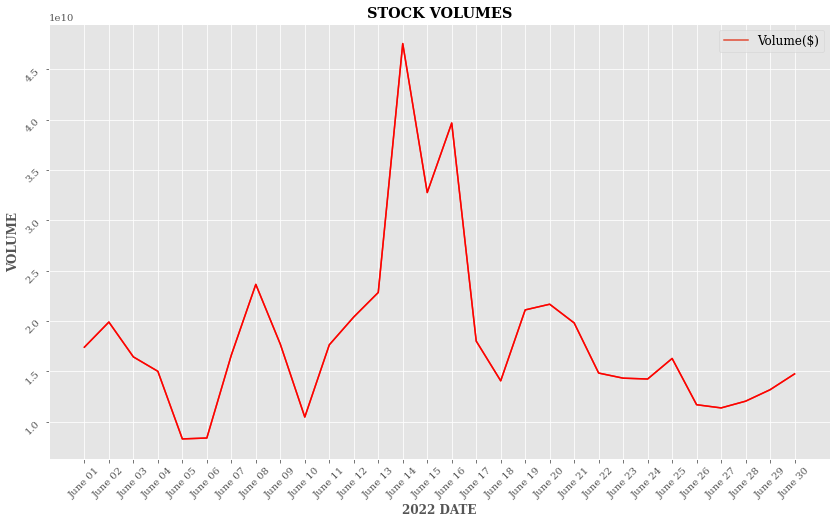

In [19]:
ax = df.plot(figsize=(14, 8))

ax.plot(df.index.values,
        df['Volume($)'],
       color='red')

plt.xlabel("2022 DATE", fontweight='bold')                           
plt.ylabel("VOLUME", fontweight='bold')                          
plt.title("STOCK VOLUMES", fontweight='bold')
plt.xticks(np.array(df.index),np.array(df.index),rotation=45)
plt.yticks(rotation=45)
plt.legend(fontsize=12)
plt.show()

### Conclusion 1
- **Based on the plot above, we can see transaction volume are starting to increase from June 10 towards the end of the first half of June**

## Extra Challenge

For the root cause of the price hike starting from June 10 to June 14, maybe we can try to check the plot of the **Open** price within the same range of days.

In [20]:
tempo = list(zip(temp_p,temp_o))
tempo = tempo[::-1]

df_o = pd.DataFrame(tempo, columns=('Date','Open($)'))
df_o['Date'] = pd.to_datetime(df_o['Date'])
df_o['Open($)'] = df_o['Open($)'].str.replace(",","")
df_o['Open($)'] = df_o['Open($)'].str.replace("$","")
df_o['Open($)'] = df_o['Open($)'].astype('float64')

df_o['Month Day'] = df_o['Date'].dt.strftime('%B %d')
df_o = df_o.set_index('Month Day')
df_o.drop('Date',inplace=True, axis=1)

In [21]:
df_o.head()

,Open($)
Month Day,
June 01,1944.08
June 02,1828.89
June 03,1833.09
June 04,1776.98
June 05,1804.26


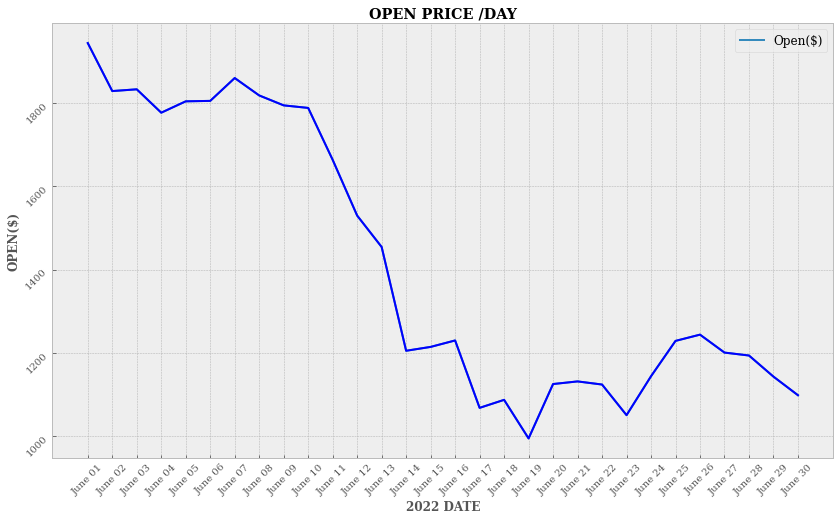

In [22]:
plt.style.use('bmh')
ax_o = df_o.plot(figsize=(14, 8))

ax_o.plot(df_o.index.values,
        df_o['Open($)'],
       color='blue')

plt.xlabel("2022 DATE", fontweight='bold')                           
plt.ylabel("OPEN($)", fontweight='bold')                          
plt.title("OPEN PRICE /DAY", fontweight='bold')
plt.xticks(np.array(df_o.index),np.array(df_o.index),rotation=45)
plt.yticks(rotation=45)
plt.legend(fontsize=12)
plt.show()

### Conclusion 2

- **From June 10 towards the end of the first half, the Open graph shows a rapid decrease in the value of Etherium. This might be the cause for** rapid increase of volume transaction **within the same range of days since** "Buying the Dips" **trend is so popular within the cryptocurrencies exchange**

## Graph: All In One

(array([ 800., 1000., 1200., 1400., 1600., 1800., 2000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

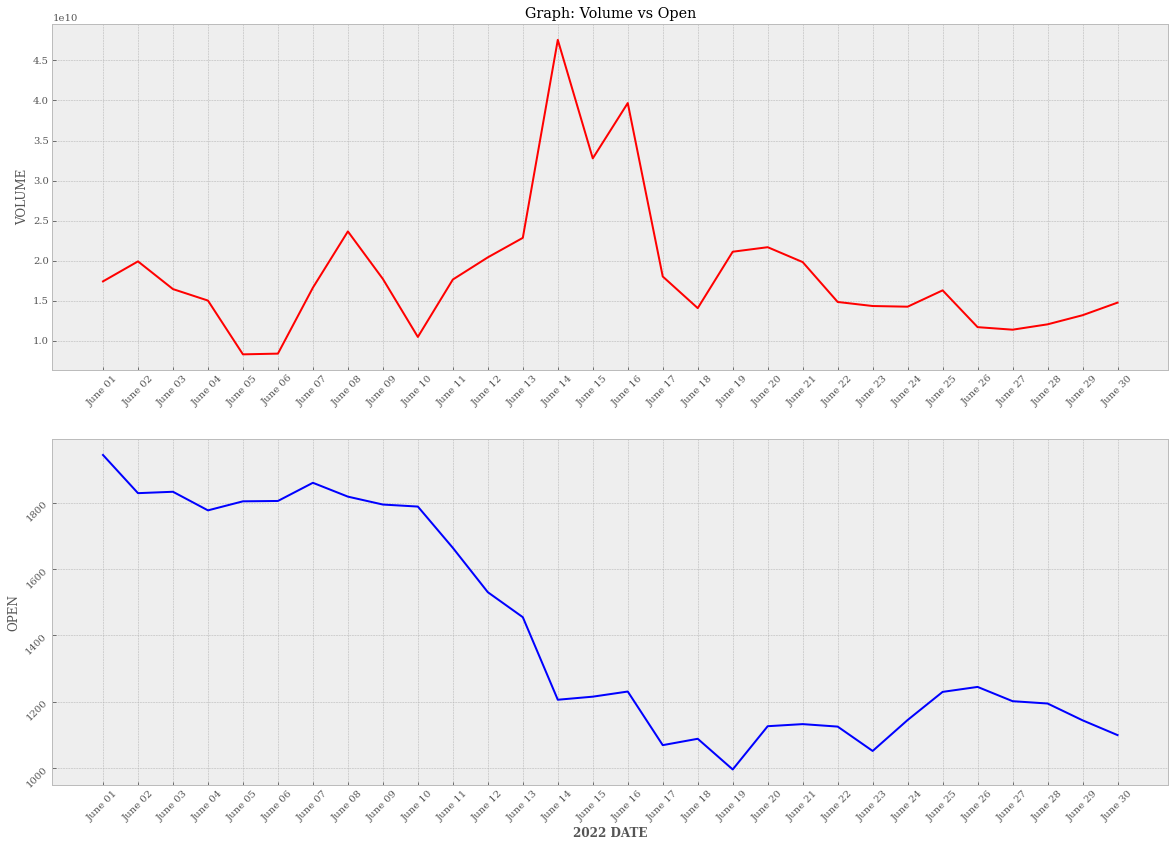

In [23]:
fig, axes = plt.subplots(2,figsize=(20, 14))

axes[0].plot(df.index.values,df['Volume($)'],color='red')
axes[0].set_ylabel('VOLUME', fontsize=12)
axes[0].set_xticklabels(np.array(df.index),rotation=45)

axes[1].plot(df_o.index.values,df_o['Open($)'],color='blue')
axes[1].set_ylabel('OPEN', fontsize=12)

axes[0].set_title('Graph: Volume vs Open')

plt.xlabel("2022 DATE", fontweight='bold')  
plt.xticks(np.array(df_o.index),np.array(df_o.index),rotation=45)
plt.yticks(rotation=45)